In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
import scipy.stats as stats
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_arrays as ua
import datetime
import matplotlib.colors as mcolors
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from utils import u_plot as uplot
import salem
from scipy.stats import gaussian_kde, linregress
import numpy.ma as ma
import warnings

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
tab = pd.read_csv('/home/ck/DIR/cornkle/data/HUARAZ/dry_wet_schlump/wet_only_ERA5_GRIDSAT_UTCDay_allDates.csv', na_values=[-999])

tab = pd.DataFrame.from_dict(tab)# &  &
tab['date'] = pd.to_datetime(tab['date'], format='%Y-%m-%d')
#tab = tab.set_index('date')

In [4]:
fpath = cnst.network_data + 'figs/HUARAZ/'

In [5]:
tab.keys()

Index(['id', 'date', 'tag', 'MCSmean', 'MCSmin', 'MCScover', 'MCSmeanUTC',
       'MCSminUTC', 'MCScoverUTC', 'CloudcoverUTC', 'CloudmeanUTC',
       'CloudminUTC', 'CHIRPSmean', 'CHIRPSmax', 'MCSmeanA', 'MCSminA',
       'MCScoverA', 'MCSmeanUTCA', 'MCSminUTCA', 'MCScoverUTCA',
       'CloudcoverUTCA', 'CloudmeanUTCA', 'CloudminUTCA', 'CHIRPSmeanA',
       'CHIRPSmaxA', 'MCSmeanV', 'MCSminV', 'MCScoverV', 'MCSmeanUTCV',
       'MCSminUTCV', 'MCScoverUTCV', 'CloudcoverUTCV', 'CloudmeanUTCV',
       'CloudminUTCV', 'CHIRPSmeanV', 'CHIRPSmaxV', 'q550', 'q650', 't550',
       't650', 'u550', 'r650', 'tcwv', 'shear', 't2', 'cape', 'cin', 'u200',
       'v200', 'v550', 'tcwvA', 'q550A', 'q850A', 't550A', 't850A', 'shearA',
       'u200A', 'v200A', 'u550A', 'v550A', 'u850A', 'v850A', 't2A', 'capeA',
       'cinA', 'r850A', 'tcwvV', 'q550V', 'q850V', 't550V', 't850V', 'shearV',
       'u200V', 'v200V', 'u550V', 'v550V', 'u850V', 'v850V', 't2V', 'capeV',
       'cinV', 'r850V', 'month', 'year'

In [6]:
tab.head()

,id,date,tag,MCSmean,MCSmin,MCScover,MCSmeanUTC,MCSminUTC,MCScoverUTC,CloudcoverUTC,...,u850V,v850V,t2V,capeV,cinV,r850V,month,year,hour,dateM
0,638,1985-01-01,0.0,NaN,0.00,0.00,NaN,0.00,0.00,0.03,...,2.152993,-10.575905,NaN,NaN,NaN,92.512756,1.0,1985.0,0.0,1985-01
1,639,1985-01-02,0.0,NaN,0.00,0.00,NaN,0.00,0.00,0.05,...,2.558220,-3.067131,NaN,NaN,NaN,80.465729,1.0,1985.0,0.0,1985-01
2,640,1985-01-03,0.0,NaN,0.00,0.00,NaN,0.00,0.00,0.24,...,0.878182,-2.812065,NaN,NaN,NaN,89.388062,1.0,1985.0,0.0,1985-01
3,641,1985-01-04,0.0,-57.19,-71.12,0.96,-58.9,-71.12,0.75,0.75,...,1.649959,-4.719997,NaN,NaN,NaN,88.808250,1.0,1985.0,0.0,1985-01
4,642,1985-01-05,0.0,NaN,0.00,0.00,-49.3,-61.21,0.39,0.39,...,1.830099,-8.238181,NaN,NaN,NaN,91.843262,1.0,1985.0,0.0,1985-01


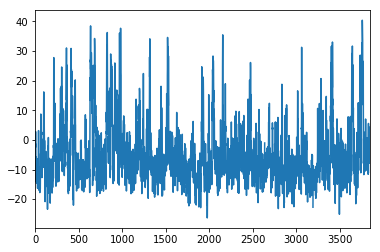

In [7]:
tab['u200'].plot()

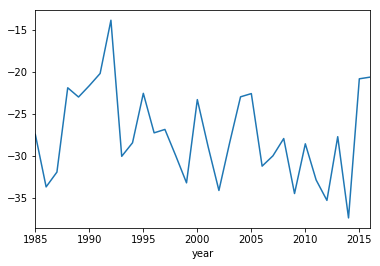

In [8]:
tab['MCSminUTC'].groupby(tab['year']).mean().plot()

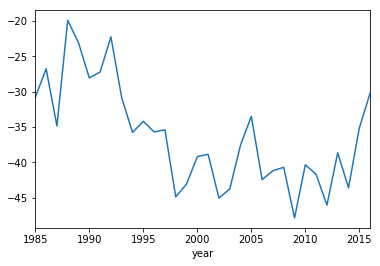

In [9]:
tab['CloudminUTC'].where((tab['MCSminUTC'])==0).groupby(tab['year']).mean().plot()

In [10]:
tab['u200'].where(tab['u200']<0).groupby(tab['month']).count() / tab['u200'].groupby(tab['month']).count()

month
1.0     0.818365
2.0     0.845556
3.0     0.822402
12.0    0.696970
Name: u200, dtype: float64

In [11]:
tab['CHIRPSmax'].where((tab['tag']>0) & (tab['CHIRPSmax']>=3)).count()/tab['CHIRPSmax'].where( (tab['tag']>0) & np.isfinite(tab['CHIRPSmax'])).count()

0.9774774774774775

In [12]:
tab['CloudcoverUTC'].where((tab['tag']>0) & (tab['CloudcoverUTC']>0.01)).count()/tab['CloudcoverUTC'].where( (tab['tag']>0) & np.isfinite(tab['CloudcoverUTC'])).count()

0.9527027027027027

In [13]:
tab['CloudcoverUTC'].where((tab['CHIRPSmax']>5) & (tab['CloudcoverUTC']>0.01)).count()/tab['CloudcoverUTC'].where( (tab['CHIRPSmax']>5) & np.isfinite(tab['CloudcoverUTC'])).count()

0.9306709265175719

In [14]:
tab['MCScoverUTC'].where((tab['CHIRPSmax']>5) & (tab['MCScoverUTC']>0.01)).count()/tab['MCScoverUTC'].where( (tab['CHIRPSmax']>5) & np.isfinite(tab['MCScoverUTC'])).count()

0.5610223642172524

In [15]:
andes_MCSfrac = np.round(tab['MCScoverUTC'].where((tab['MCScoverUTC']>0)&(tab['CHIRPSmax']>5)).count()/
                         (tab['CloudcoverUTC'].where((tab['CloudcoverUTC']>0)&(tab['CHIRPSmax']>5)).count())*100,decimals=1)

andes_MCScover = np.round(tab['MCScoverUTC'].where((tab['MCScoverUTC']>0)&(tab['CHIRPSmax']>5)).sum()/
                          (tab['CloudcoverUTC'].where((tab['CloudcoverUTC']>0)&(tab['CHIRPSmax']>5)).sum())*100,decimals=1)

andes_MCScover_200neg = np.round(tab['MCScoverUTC'].where((tab['MCScoverUTC']>0)&(tab['u200']<-1)&(tab['CHIRPSmax']>5)).count()/
                                 (tab['CloudcoverUTC'].where((tab['u200']<-1)&(tab['CloudcoverUTC']>0)&(tab['CHIRPSmax']>5)).count())*100,decimals=1)

andes_MCScover_200pos = np.round(tab['MCScoverUTC'].where((tab['MCScoverUTC']>0)&(tab['u200']>1)&(tab['CHIRPSmax']>5)).count()/
                                 (tab['CloudcoverUTC'].where((tab['u200']>1)&(tab['CloudcoverUTC']>0)&(tab['CHIRPSmax']>5)).count())*100,decimals=1)

andes_MCScover_200negc = np.round(tab['CloudcoverUTC'].where((tab['CloudcoverUTC']>0)&(tab['u200']<-1)&(tab['CHIRPSmax']>5)).count()/
                                  (tab['CloudcoverUTC'].where((tab['u200']<-1)).count())*100,decimals=1)

andes_MCScover_200posc = np.round(tab['CloudcoverUTC'].where((tab['CloudcoverUTC']>0)&(tab['u200']>1)&(tab['CHIRPSmax']>5)).count()/
                                  (tab['CloudcoverUTC'].where((tab['u200']>1)).count())*100,decimals=1)

andes_MCScover_200wind = np.round(tab['CloudcoverUTC'].where((tab['u200']<-1)).count()/
                                  (tab['CloudcoverUTC'].where(np.isfinite(tab['u200'])).count())*100,decimals=1)

andes_MCScover_500wind = np.round(tab['CloudcoverUTC'].where((tab['u550']<-1)).count()/
                                  (tab['CloudcoverUTC'].where(np.isfinite(tab['u550'])).count())*100,decimals=1)

In [16]:
amazon_MCSfrac = np.round(tab['MCScoverUTCA'].where((tab['MCScoverUTCA']>0)&(tab['CHIRPSmaxA']>5)).count()/
                          tab['CloudcoverUTCA'].where((tab['CloudcoverUTCA']>0)&(tab['CHIRPSmaxA']>5)).count()*100,decimals=1)

amazon_MCScover = np.round(tab['MCScoverUTCA'].where((tab['MCScoverUTCA']>0)&(tab['CHIRPSmaxA']>5)).sum()/
                           tab['CloudcoverUTCA'].where((tab['CloudcoverUTCA']>0)&(tab['CHIRPSmaxA']>5)).sum()*100,decimals=1)

amazon_MCScover_200neg = np.round(tab['MCScoverUTCA'].where((tab['MCScoverUTCA']>0)&(tab['u200A']<-1)&(tab['CHIRPSmaxA']>5)).count()/
                                  (tab['CloudcoverUTCA'].where((tab['u200A']<-1)&(tab['CloudcoverUTCA']>0)&(tab['CHIRPSmaxA']>5)).count())*100,decimals=1)

amazon_MCScover_200pos = np.round(tab['MCScoverUTCA'].where((tab['MCScoverUTCA']>0)&(tab['u200A']>1)&(tab['CHIRPSmaxA']>5)).count()/
                                  (tab['CloudcoverUTCA'].where((tab['u200A']>1)&(tab['CloudcoverUTCA']>0)&(tab['CHIRPSmaxA']>5)).count())*100,decimals=1)

amazon_MCScover_200negc = np.round(tab['CloudcoverUTCA'].where((tab['CloudcoverUTCA']>0)&(tab['u200A']<-1)&(tab['CHIRPSmaxA']>5)).count()/
                                   (tab['CloudcoverUTCA'].where((tab['u200A']<-1)).count())*100,decimals=1)

amazon_MCScover_200posc = np.round(tab['CloudcoverUTCA'].where((tab['CloudcoverUTCA']>0)&(tab['u200A']>1)&(tab['CHIRPSmaxA']>5)).count()/
                                   (tab['CloudcoverUTCA'].where((tab['u200A']>1)).count())*100,decimals=1)

amazon_MCScover_200wind = np.round(tab['CloudcoverUTCA'].where((tab['u200A']<-1)).count()/
                                  (tab['CloudcoverUTCA'].where(np.isfinite(tab['u200A'])).count())*100,decimals=1)

amazon_MCScover_500wind = np.round(tab['CloudcoverUTCA'].where((tab['u550A']<-1)).count()/
                                  (tab['CloudcoverUTCA'].where(np.isfinite(tab['u550A'])).count())*100,decimals=1)

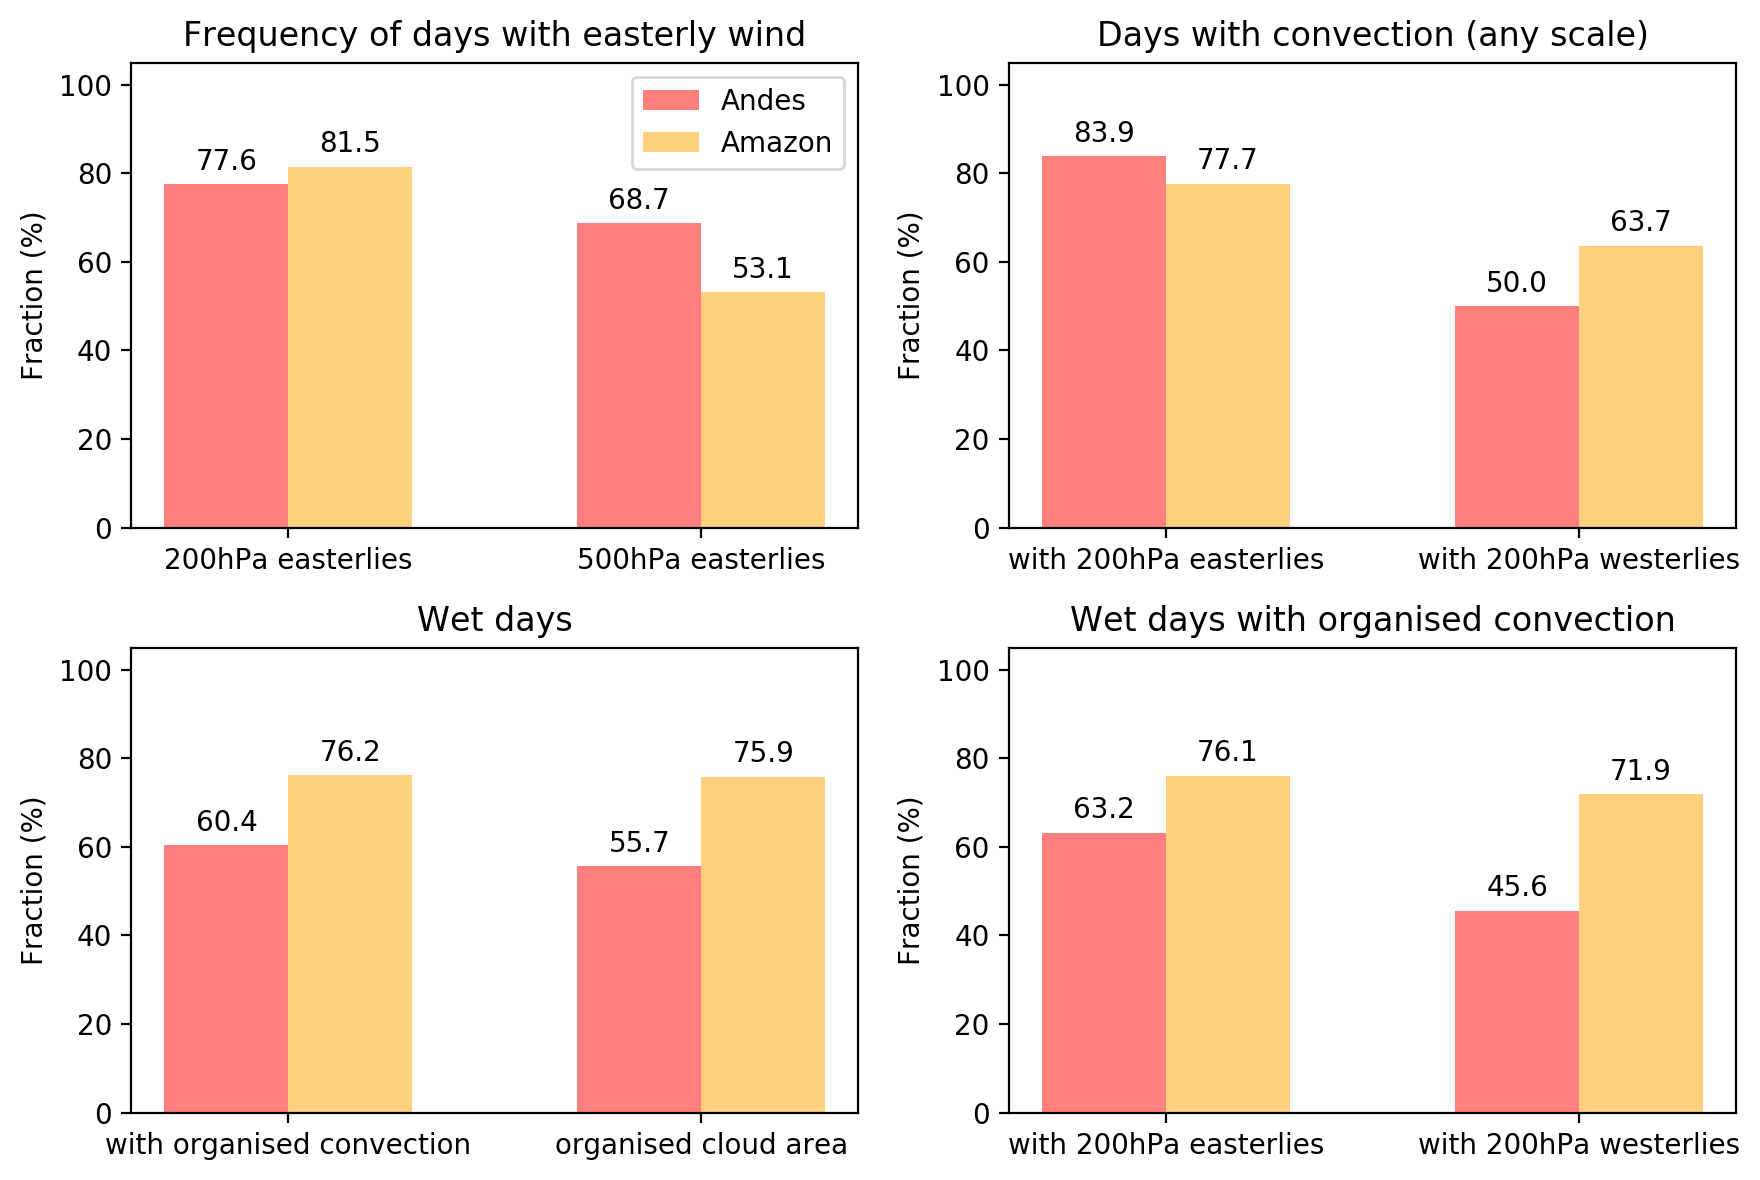

In [17]:
labels = [
          ['200hPa easterlies', '500hPa easterlies'],
          ['with 200hPa easterlies', 'with 200hPa westerlies'],
          ['with organised convection', 'organised cloud area'], 
          ['with 200hPa easterlies', 'with 200hPa westerlies']]

titles = ['Frequency of days with easterly wind', 
          'Days with convection (any scale)', 
          'Wet days',
          'Wet days with organised convection']

andes_all = [
             np.array([andes_MCScover_200wind, andes_MCScover_500wind]), 
             np.array([andes_MCScover_200negc, andes_MCScover_200posc]),
             np.array([andes_MCSfrac, andes_MCScover]), 
             np.array([andes_MCScover_200neg, andes_MCScover_200pos]) ]

amazon_all = [
               np.array([amazon_MCScover_200wind, amazon_MCScover_500wind]),
               np.array([amazon_MCScover_200negc, amazon_MCScover_200posc]),
               np.array([amazon_MCSfrac, amazon_MCScover]), 
               np.array([amazon_MCScover_200neg, amazon_MCScover_200pos]) ]

  # the label locations
width = 0.3  # the width of the bars

fig = plt.figure(figsize=(9,6), dpi=200)
cnt = 1
for labs, andes, amazon, title in zip(labels,andes_all,amazon_all, titles):
    x = np.arange(len(labs))
    ax = fig.add_subplot(2,2,cnt)
    rects1 = ax.bar(x - width/2, andes, width, label='Andes', color='red', alpha=0.5)
    rects2 = ax.bar(x + width/2, amazon, width, label='Amazon', color='orange', alpha=0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Fraction (%)')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labs)
    ax.set_ylim(0,105)
    if cnt == 1:
        ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    cnt+=1
    autolabel(rects1)
    autolabel(rects2)



fig.tight_layout()
plt.savefig(fpath+'barplots.png')

In [18]:
def density_plot(v1,v2):
    xy = np.vstack([v1, v2])
    z = gaussian_kde(xy)(xy)
    data = z / (z.max() - z.min())

    rr = stats.pearsonr(v1,v2)
    print('pears', stats.pearsonr(v1,v2))
    
    return data, rr

In [20]:
v1 = 'q200'
v2 = 'q650'

mask = np.isfinite(tab[v1]) & np.isfinite(tab[v2])
d1 = tab[v1][mask]
d2 = tab[v2][mask]

data1, r1 = density_plot(d1*1000, d2*1000)
f= plt.figure()
ax = f.add_subplot(111)
ax.scatter(d1*1000, d2*1000, c=data1, edgecolor='', cmap='viridis_r', s=20)
ax.set_ylim(4,9)

KeyError: 'q200'

In [29]:
for month in [12,1,2,3]:
    mm = tab[tab['month']==month]
    print('u550', month, np.round(np.sum(mm['u550']<0)/np.sum(np.isfinite(mm['u550'])), decimals=2))
    print('u200', month, np.round(np.sum(mm['u200']<0)/np.sum(np.isfinite(mm['u200'])), decimals=2))
    print('u200 easterly and 550 westerly', month, np.round(np.sum((mm['u200']<0)&(mm['u550']>0))/np.sum(np.isfinite(mm['u200'])), decimals=2))
    print('u200 westerly and 550 easterly', month, np.round(np.sum((mm['u200']>0)&(mm['u550']<0))/np.sum(np.isfinite(mm['u200'])), decimals=2))
    print('u200 westerly and 550 westerly', month, np.round(np.sum((mm['u200']>0)&(mm['u550']>0))/np.sum(np.isfinite(mm['u200'])), decimals=2))
    print('u200 easterly and 550 easterly', month, np.round(np.sum((mm['u200']<0)&(mm['u550']<0))/np.sum(np.isfinite(mm['u200'])), decimals=2))

u550 12 0.77
u200 12 0.7
u200 easterly and 550 westerly 12 0.17
u200 westerly and 550 easterly 12 0.24
u200 westerly and 550 westerly 12 0.06
u200 easterly and 550 easterly 12 0.53
u550 1 0.83
u200 1 0.82
u200 easterly and 550 westerly 1 0.15
u200 westerly and 550 easterly 1 0.17
u200 westerly and 550 westerly 1 0.02
u200 easterly and 550 easterly 1 0.67
u550 2 0.82
u200 2 0.85
u200 easterly and 550 westerly 2 0.16
u200 westerly and 550 easterly 2 0.14
u200 westerly and 550 westerly 2 0.02
u200 easterly and 550 easterly 2 0.69
u550 3 0.88
u200 3 0.82
u200 easterly and 550 westerly 3 0.1
u200 westerly and 550 easterly 3 0.16
u200 westerly and 550 westerly 3 0.02
u200 easterly and 550 easterly 3 0.72


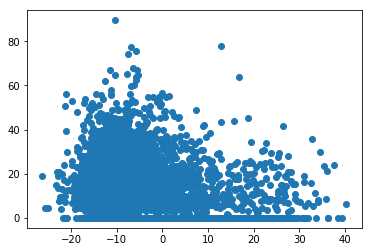

In [12]:
plt.scatter((tab['u200']), tab['CHIRPSmax'])

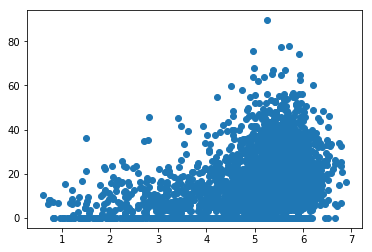

In [27]:
plt.scatter((tab['q550'])*1000, tab['CHIRPSmax'])

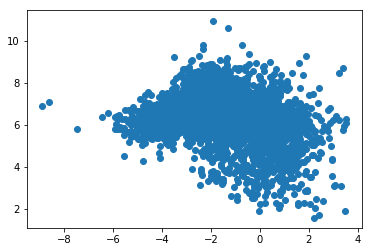

In [25]:
plt.scatter((tab['u550']), (tab['q650'])*1000)

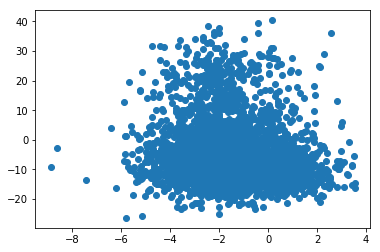

In [22]:
plt.scatter((tab['u550']), (tab['u200']))

Text(0,0.5,'Amazon')

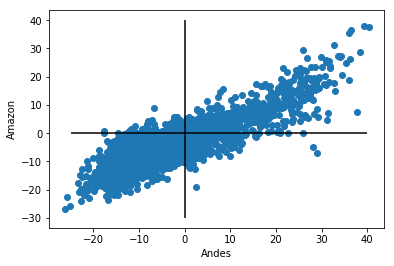

In [100]:
plt.scatter(tab['u200'], tab['u200A'])
plt.hlines(0,-25,40)
plt.vlines(0,-30,40)
plt.xlabel('Andes')
plt.ylabel('Amazon')

Text(0,0.5,'Amazon')

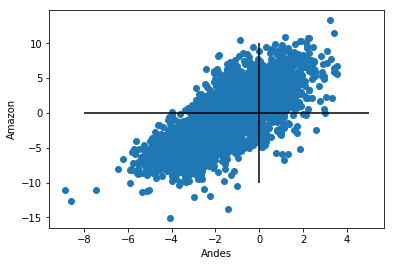

In [105]:
plt.scatter(tab['u550'], tab['u550A'])
plt.hlines(0,-8,5)
plt.vlines(0,-10,10)
plt.xlabel('Andes')
plt.ylabel('Amazon')

Text(0,0.5,'Amazon')

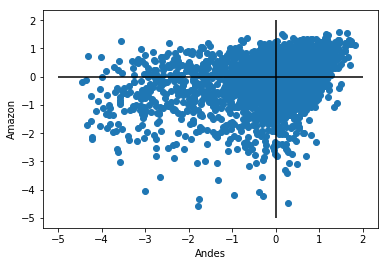

In [480]:
plt.scatter((tab['q550']-tab['q550'].mean())*1000, (tab['q550A']-tab['q550A'].mean())*1000)
plt.hlines(0,-5,2)
plt.vlines(0,-5,2)
plt.xlabel('Andes')
plt.ylabel('Amazon')

Text(0,0.5,'Amazon')

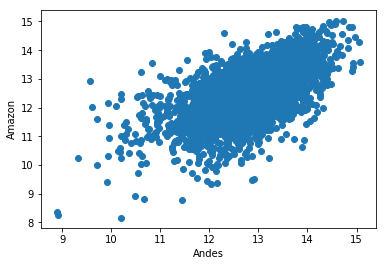

In [494]:
plt.scatter((tab['q850V'])*1000, (tab['q850A'])*1000)
plt.xlabel('Andes')
plt.ylabel('Amazon')

Text(0,0.5,'Amazon')

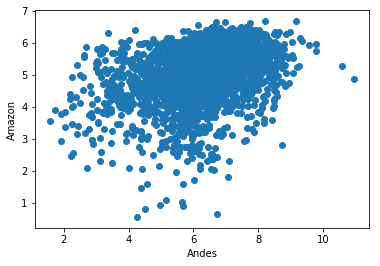

In [500]:
plt.scatter((tab['q650'])*1000, (tab['q550A'])*1000)
plt.xlabel('Andes')
plt.ylabel('Amazon')

In [475]:
def create_2dhist(ds, xbins,ybins):
#     sheardiff = shearbins[0:-1]+((xbins[1::]-shearbins[0:-1])/2)[0]
#     qdiff= qbins[0:-1] + ((qbins[1::]-qbins[0:-1])/2)[0]

    outperc_tt = np.zeros((len(ybins),len(xbins)))
    outperc_pp = np.zeros((len(ybins),len(xbins)))
    outval = np.zeros((len(ybins),len(xbins)))
    outarea_ds = np.zeros((len(ybins),len(xbins)))

    corrlist = []
    stdlist = []
    
    for isq, qql in enumerate(ybins[0:-1]):
        for issh, shl in enumerate(xbins[0:-1]):

            poss_ds = (ds.u200 >= shl) & (ds.u200 < xbins[issh+1]) & (ds.u550>=qql) & (ds.u550 < ybins[isq+1])
          
            try:
                ds_mean = np.nanmean(ds.CHIRPSmax[poss_ds])#, 50)
            except IndexError:
                ds_mean = np.nan
            
            mcs_mask = poss_ds & (ds.MCSmin < 0)
            try:
                prcp_mean = np.nanmean(ds.MCSmin[mcs_mask])#, 50)
            except:
                prcp_mean = np.nan
            
            cloud_mask = poss_ds & (ds.CloudminUTC < 0)
            try:
                ds_amean = np.nanmean(ds.CloudminUTC[cloud_mask])#, 50)
            except IndexError:
                ds_amean = np.nan

            outarea_ds[issh,isq] = ds_amean
            outperc_tt[issh,isq] = ds_mean
            outperc_pp[issh,isq] = prcp_mean

            outval[issh,isq] = np.sum(poss_ds)
            
#             outperc_tt[-3,0] = np.nan
#             outperc_pp[-3,0] = np.nan
            
            
    return outperc_tt, outperc_pp, outarea_ds, outval

In [476]:
def create_2dhist2(ds, xbins,ybins):
#     sheardiff = shearbins[0:-1]+((xbins[1::]-shearbins[0:-1])/2)[0]
#     qdiff= qbins[0:-1] + ((qbins[1::]-qbins[0:-1])/2)[0]

    outperc_tt = np.zeros((len(ybins),len(xbins)))
    outperc_pp = np.zeros((len(ybins),len(xbins)))
    outval = np.zeros((len(ybins),len(xbins)))
    outarea_ds = np.zeros((len(ybins),len(xbins)))

    corrlist = []
    stdlist = []
    
    for isq, qql in enumerate(ybins[0:-1]):
        for issh, shl in enumerate(xbins[0:-1]):

            poss_ds = (ds.q650*1000 >= shl) & (ds.q650*1000 < xbins[issh+1]) & (ds.q550A*1000>=qql) & (ds.q550A*1000 < ybins[isq+1])
          
            try:
                ds_mean = np.nanmean(ds.CHIRPSmax[poss_ds])#, 50)
            except IndexError:
                ds_mean = np.nan
            
            mcs_mask = poss_ds & (ds.MCSmin < 0)
            try:
                prcp_mean = np.nanmean(ds.MCSmin[mcs_mask])#, 50)
            except:
                prcp_mean = np.nan
            
            cloud_mask = poss_ds & (ds.CloudminUTC < 0)
            try:
                ds_amean = np.nanmean(ds.CloudminUTC[cloud_mask])#, 50)
            except IndexError:
                ds_amean = np.nan

            outarea_ds[issh,isq] = ds_amean
            outperc_tt[issh,isq] = ds_mean
            outperc_pp[issh,isq] = prcp_mean

            outval[issh,isq] = np.sum(poss_ds)
            
#             outperc_tt[-3,0] = np.nan
#             outperc_pp[-3,0] = np.nan
            
            
    return outperc_tt, outperc_pp, outarea_ds, outval

In [477]:
# xbins = np.linspace(-20,20,7)
# ybins = np.linspace(-4,4,7)
xbins = np.linspace(2,8,7)
ybins = np.linspace(2,8,7)
chirpsmax, MCSmin, MCScover, nbval = create_2dhist(tab,xbins ,ybins)

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice


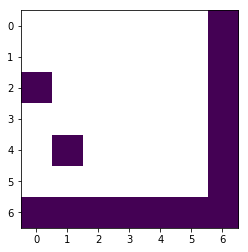

In [478]:
plt.imshow(chirpsmax)

In [479]:
ch = {
    'data' : chirpsmax,
    'ybins' : ybins,
    'xbins' : xbins,
    'title' : 'Chirpsmax',
    'valid' : nbval,# dsval_mar,
    'cbarlabel' : 'mm day',
    'vmin' : np.percentile(chirpsmax[(chirpsmax!=0) & np.isfinite(chirpsmax)],2),
    'vmax' : np.percentile(chirpsmax[(chirpsmax!=0) & np.isfinite(chirpsmax)],98),
    'ylabel' : '550hPa zonal wind',
    'xlabel' : '200hPa zonal wind'
}

MCSmin[MCSmin==0]=np.nan
mcs = {
    'data' : MCSmin,
    'ybins' : ybins,
    'xbins' : xbins,
    'title' : 'MCSmin',
    'valid' : nbval,
    'cbarlabel' : 'C',
    'vmin' : np.percentile(MCSmin[(MCSmin!=0) & np.isfinite(MCSmin)],2),
    'vmax' : np.percentile(MCSmin[(MCSmin!=0) & np.isfinite(MCSmin)],98),
    'ylabel' : '550hPa zonal wind',
    'xlabel' : '200hPa zonal wind'
}

mcsc = {
    'data' : MCScover,
    'ybins' : ybins,
    'xbins' : xbins,
    'title' : 'MCScover',
    'valid' : nbval,
    'cbarlabel' : '%',
    'vmin' : np.percentile(MCScover[(MCScover!=0) & np.isfinite(MCScover)],2),
    'vmax' : np.percentile(MCScover[(MCScover!=0) & np.isfinite(MCScover)],98),
    'ylabel' : '550hPa zonal wind',
    'xlabel' : '200hPa zonal wind'
}

IndexError: cannot do a non-empty take from an empty axes.

In [472]:
def hist2d_three(data, valid=False):
    
    #from palettable.colorbrewer.qualitative import Blues_6, Reds_6_r
    
    f = plt.figure(figsize=(15,4))
    for i, dat in enumerate(data):
        ax = f.add_subplot(1,3,i+1)
        if i>1:
            cmap = 'Blues'
        else:
            cmap = 'Reds_r'
        X, Y = np.meshgrid(dat['xbins'],dat['ybins'])
        cmapp = uplot.discrete_cmap(10, base_cmap=cmap)
 
        if valid:
            
            dat['data'][dat['valid']<3] = np.nan
        Zm = ma.masked_where(np.isnan(dat['data']),dat['data'])
       
        mappable = ax.pcolormesh(X, Y, Zm.T, cmap=cmapp, vmin=dat['vmin'], vmax=dat['vmax']) # viridis_rvmin=20, vmax=40
        ax.set_ylabel(dat['ylabel'])
        ax.set_xlabel(dat['xlabel'])
        ax.set_title(dat['title'])
        cbar = f.colorbar(mappable, ticks=np.linspace(dat['vmin'],dat['vmax'],11)) # ticks=np.linspace(30,45,11) , ticks=np.linspace(20,40,11)
        cbar.set_label(dat['cbarlabel'])
        ax.set_facecolor('grey')
        #ax.set_ylim(13,17.5)

    plt.tight_layout() 
    #plt.savefig(cnst.network_data + 'figs/CLOVER/fig3_obsOnly.png')

In [473]:
data_list = [mcs, mcsc, ch]

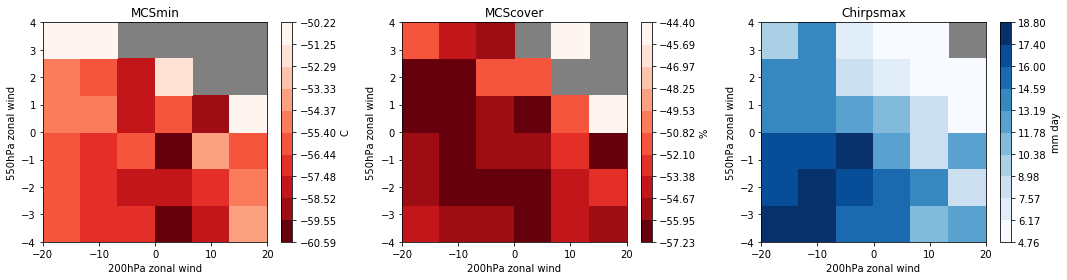

In [474]:
hist2d_three(data_list, valid=False)